<a href="https://colab.research.google.com/github/SG-Akshay10/Dynamic_Programming/blob/main/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Design and Analysis of Algorithms - CIA 2**

### **Question**: 
Design a neural network (the choice of implementation model can be pytorch, tensorflow or the whitebox model) for the data set shared in the ML lab assignment for neural networks. 

* Develop individual code base using following algorithms for weight optimization:
1.	Genetic Algorithm
2.	Cultural Algorithm
3.	Particle Swarm Optimization
4.	Ant Colony Optimization
* 
Data to be uploaded to github
1.	Note on the comparison of performance for the four methods. 
2.	The codebase for all four methods 
3.	The research papers that you have referred to.



### Dependencies and Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import datasets, transforms

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Bank_Personal_Loan_Modelling.csv")

Columns of the dataset : 
* ID: Customer ID
* Age: Customer Age
* Experience: Amount of work experience in years
* Income: Amount of annual income (in thousands)
* Zipcode: Zipcode of where customer lives
* Family: Number of family members
* CCAvg: Average monthly credit card spendings
* Education: Education level (1: Bachelor, 2: Master, 3: Advanced Degree)
* Mortgage: Mortgage of house (in thousands)
* Securities Account: Boolean of whether customer has a securities account
* CD Account: Boolean of whether customer has Certificate of Deposit account
* Online: Boolean of whether customer uses online banking
* CreditCard: Does the customer use credit card issued by the bank?
* Personal Loan: This is the target variable (Binary Classification Problem)

In [ ]:
# We can drop the column Customer ID as they do not help us in the prediction.
df = data.drop(columns=["ID"],axis=1)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isna().any()

Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

In [ ]:
# Percentage of customers having credit cards

CC_percent=(len(df[df['CreditCard']==1])/len(df))*100

print('The percentage of customers having credit cards is', CC_percent, '%')

The percentage of customers having credit cards is 29.4 %


In [ ]:
#Number of customers who accepted a loan
accepted_customers= df[df['Personal Loan']==1]

# Percentage of customers who accepted a load
accepted_percent=(len(accepted_customers)/len(df))*100

print('The percentage of customers who accepted a loan', accepted_percent, '%')

The percentage of customers who accepted a loan 9.6 %


## Data Visualization

In [ ]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

<Axes: xlabel='Personal Loan', ylabel='count'>

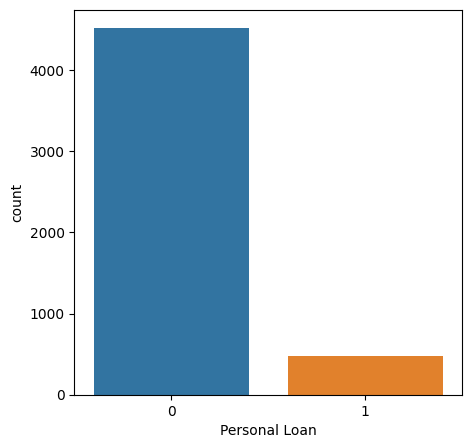

In [ ]:
# Visualize the Personal loan feature
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Personal Loan")

<Axes: xlabel='Education', ylabel='count'>

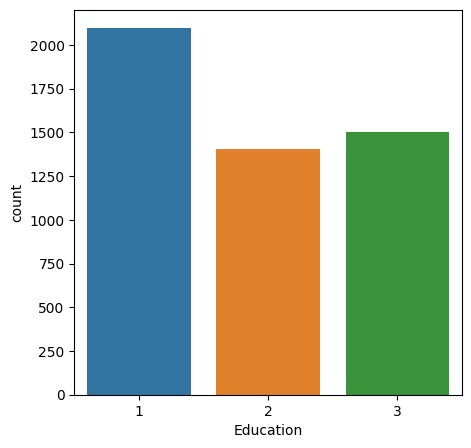

In [ ]:
# Visualize the education feature
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Education")

<Axes: xlabel='Age', ylabel='count'>

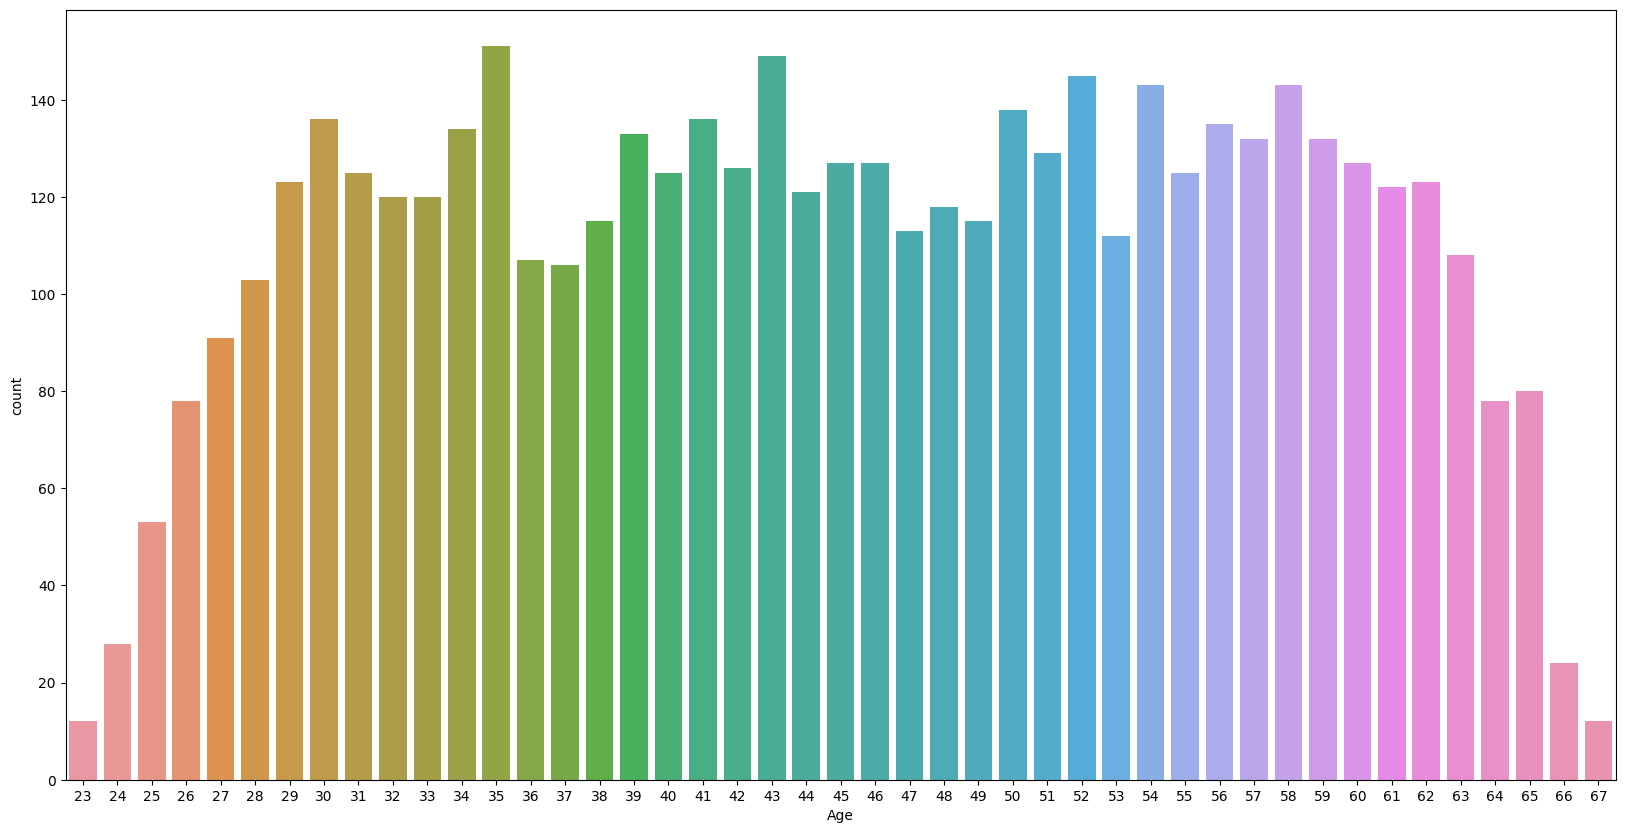

In [ ]:
# Visualize the age feature
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Age")

<Axes: xlabel='CreditCard', ylabel='count'>

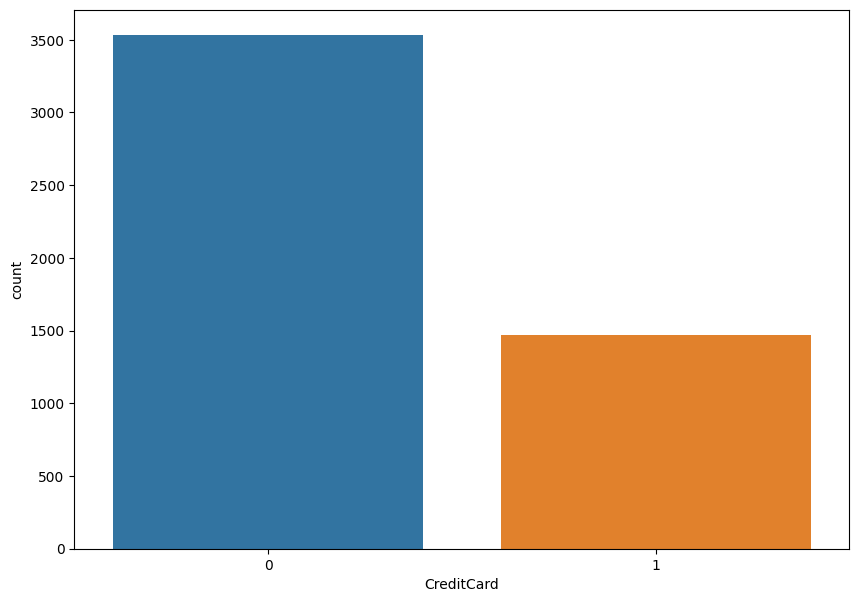

In [ ]:
# Visualize credit card availability

plt.figure(figsize=(10,7))
sns.countplot(data=df, x="CreditCard")

<ipython-input-254-82b9d572e75a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

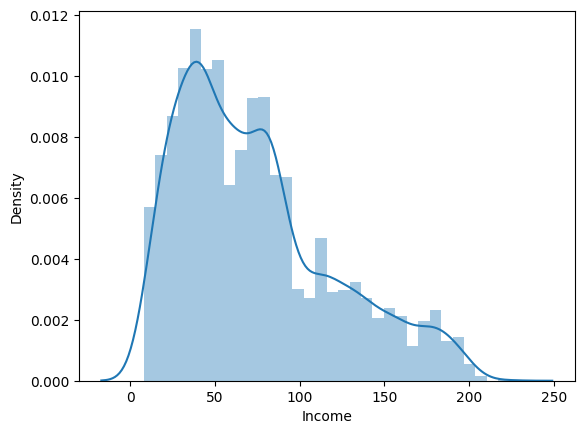

In [ ]:
# Visualize income data

sns.distplot(df['Income'])

<ipython-input-255-d750f06a723f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loans["Income"], label='Approved')
<ipython-input-255-d750f06a723f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personal_loans["Income"], label='Not Approved')


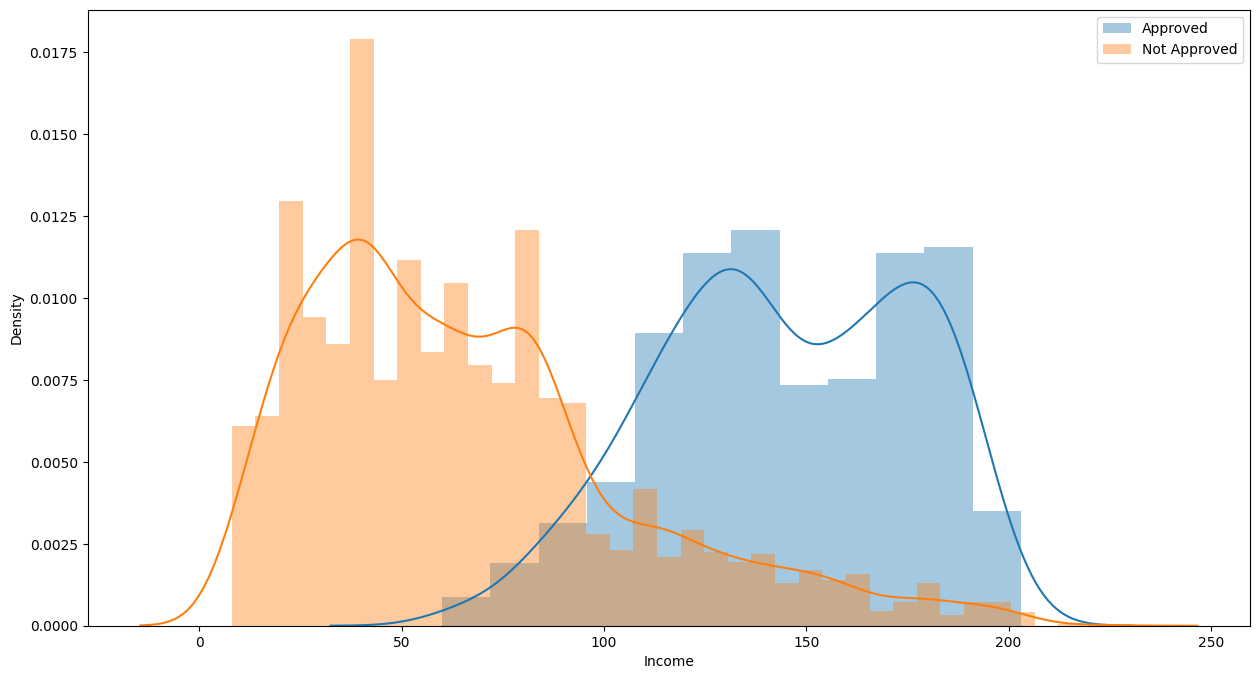

In [ ]:
personal_loans = df[df['Personal Loan'] == 1].copy()
no_personal_loans=df[df['Personal Loan']==0]
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["Income"], label='Approved')
sns.distplot(no_personal_loans["Income"], label='Not Approved')
plt.legend()
plt.show()

## Train Test Split

In [ ]:
df.shape

(5000, 13)

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=69)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3750, 12), (1250, 12), (3750,), (1250,))

# **# PyTorch Neural Network**

In [ ]:
batch_size = 64

In [ ]:
train_x = torch.from_numpy(x_train).to(torch.float32)
train_y = torch.from_numpy(y_train).to(torch.float32)

In [ ]:
test_x = torch.from_numpy(x_test).to(torch.float32)
test_y = torch.from_numpy(y_test).to(torch.float32)

In [ ]:
class Data(Dataset):
    def __init__(self, x, y):
        self.x = torch.from_numpy(x.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.x.shape[0]
       
    def __getitem__(self, index):
        return self.x[index], self.y[index]
   
    def __len__(self):
        return self.len

In [ ]:
train_x.shape, train_y.shape

(torch.Size([3750, 12]), torch.Size([3750]))

In [ ]:
train_data = TensorDataset(train_x,train_y)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [ ]:
test_data = TensorDataset(test_x,test_y)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# **# Building Model**

In [ ]:
class NeuralNetwork(torch.nn.Module):
    
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        
        self.layer1 = torch.nn.Linear(12,16)
        self.layer2 = torch.nn.Linear(16,8)
        self.layer3 = torch.nn.Linear(8,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        return x

In [ ]:
neural_network = NeuralNetwork()

# **# Weight Optimization using Genetic Algorithm**

In [ ]:
def fitness_function(model):
  y_pred = model(train_x)
  y_pred = torch.where(y_pred>=0.5,1,0).flatten()
  accuracy = (y_pred == train_y).sum().float().item() / len(train_dataloader.dataset)
  return round(accuracy, 4)

In [ ]:
def mutation(child,matrix_size):
  # Child 1 Mutation
  random_start = random.randrange(0,matrix_size//2)
  random_end = random.randrange(random_start,matrix_size)
  child_mutate = child.copy()
  child_mutate[random_start:random_end] = child_mutate[random_start:random_end][::-1]

  return child_mutate

In [ ]:
def crossover(parent1,parent2):
    # Shape of the weights and biases
    shape = [i.numpy().shape for i in parent1.parameters()]
    size = [i[0]*i[1] if len(i) == 2 else i[0] for i in shape]
    
    # Flattening the parameters for cross over
    params1 = np.concatenate([i.numpy().flatten() for i in parent1.parameters()])
    params2 = np.concatenate([i.numpy().flatten() for i in parent2.parameters()])
    
    # Crossover
    crossover_point = random.randrange(np.floor_divide(len(params1), 2) - 10, np.floor_divide(len(params1), 2) + 10)
    
    child_1 = np.concatenate([params1[:crossover_point], params2[crossover_point:]])
    child_2 = np.concatenate([params2[:crossover_point], params1[crossover_point:]])
    
    #Mutation of Child
    child_1_mutate = mutation(child_1,len(params1))
    child_2_mutate = mutation(child_2,len(params2))
    
    # Converting the array to parameters
    children = [child_1, child_2, child_1_mutate, child_2_mutate]
    output = list()
    
    for child in children:
        param = []
        curr_index = 0
        for i in range(len(size)):
            subset = child[curr_index : curr_index + size[i]]
            array = subset.reshape(shape[i])
            curr_index += size[i]
            param.append(array)
        param = np.array(param, dtype="object")
        output.append(param)
    
    output = np.array(output, dtype="object")
    return output

In [ ]:
# Training 
torch.manual_seed(420)
torch.set_grad_enabled(False)
population_size = 1000

In [ ]:
def train(generations):
  population  = np.array([NeuralNetwork() for i in range(population_size)])
  best = None

  for i in range(generations):
    population = sorted(population, key=lambda x: fitness_function(x))
    best = population[-1]
    if(i%10)==0:
      print(f"Generation {i} : {fitness_function(population[-1])}")

    parents = population[-4:]
    parent_1, parent_2 = population[:2]

    outputs = [crossover(parents[i], parents[i+2]) for i in range(2)]
    output = np.concatenate(outputs)

    new_population = np.array([NeuralNetwork() for i in range(len(output))])
    for i, model in enumerate(new_population,0):
      for j, param in enumerate(model.parameters(),0):
        param.data = (torch.tensor(output[i][j]))

    new_population = np.concatenate([new_population, [parent_1, parent_2]])
    population = new_population.copy()
  
  return best

In [ ]:
best_model = train(100)

Generation 0 : 0.9091
Generation 10 : 0.9029
Generation 20 : 0.9051
Generation 30 : 0.9144
Generation 40 : 0.9123
Generation 50 : 0.9136
Generation 60 : 0.9184
Generation 70 : 0.9179
Generation 80 : 0.9195
Generation 90 : 0.9195


# **Classification Report**

In [ ]:
y_pred = best_model(test_x)
y_pred = torch.where(y_pred>=0.5, 1, 0).flatten()
genetic = classification_report(y_pred,test_y)
print(genetic)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1217
           1       0.24      0.85      0.38        33

    accuracy                           0.93      1250
   macro avg       0.62      0.89      0.67      1250
weighted avg       0.98      0.93      0.95      1250

